<a href="https://colab.research.google.com/github/Abugahh/Network-Anomaly-Detection/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Understanding the dataset

## Cyber attack data

* The data is collected by the University of New South Wales (Australia). That includes records of different types of cyber attacks. The dataset contains network packets captured in the Cyber Range Lab of UNSW Canberra. The data is provided in two sets of training and testing data.

* The dataset includes nine types of attacks, including:

1. Fuzzers: Attack that involves sending random data to a system to test its resilience and identify any vulnerabilities.

2. Analysis: A type of attack that involves analyzing the system to identify its weaknesses and potential targets for exploitation.

3. Backdoors: Attack that involves creating a hidden entry point into a system for later use by the attacker.

4. DoS (Denial of Service): Attack that aims to disrupt the normal functioning of a system, making it unavailable to its users.

5. Exploits: Attack that leverages a vulnerability in a system to gain unauthorized access or control.

6. Generic: A catch-all category that includes a variety of different attack types that do not fit into the other categories.

7. Reconnaissance: Attack that involves gathering information about a target system, such as its vulnerabilities and potential entry points, in preparation for a future attack.

8. Shellcode: Attack that involves executing malicious code, typically in the form of shell scripts, on a target system.

9. Worms: A type of malware that spreads itself automatically to other systems, often causing harm in the process.

* These nine categories cover a wide range of attack types that can be used to exploit a system, and it is important to be aware of them to protect against potential security threats.

In [ ]:
##Fetures reading columns
import chardet
import pandas as pd

with open('NUSW-NB15_features (1).csv', 'rb') as f:
  result = chardet.detect(f.read())
  encoding = result['encoding']

df = pd.read_csv('NUSW-NB15_features (1).csv', encoding=encoding)

df.head(49)

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [1]:
import pandas as pd
import numpy as np


In [2]:
training = pd.read_csv('Dataa/UNSW_NB15_training-set (1).csv')
testing = pd.read_csv('Dataa/UNSW_NB15_testing-set (1).csv')

print("training ",training.shape)
print("testing ",testing.shape)

training  (82332, 45)
testing  (175341, 45)


In [6]:
df.head(1000)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.183870,tcp,-,FIN,14,14,784,764,22.806559,254,...,1,3,0,0,0,2,4,0,Fuzzers,1
996,0.195360,tcp,http,FIN,10,6,1330,268,76.781325,254,...,1,1,0,0,1,1,1,0,Exploits,1
997,0.230088,tcp,http,FIN,10,10,816,5840,82.577103,62,...,1,1,0,0,1,1,1,0,Exploits,1
998,0.212793,tcp,http,FIN,12,20,876,19342,145.681489,62,...,1,1,0,0,1,2,1,0,DoS,1


In [3]:
#Concatinating the dataframe
df = pd.concat([training,testing]).drop('id',axis=1)
df = df.reset_index(drop=True)

df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [7]:
# Count the number of null values in each column
# df.isnull().sum()

# Count the number of null values in each row
df.isnull().sum(axis=1)


0         0
1         0
2         0
3         0
4         0
         ..
257668    0
257669    0
257670    0
257671    0
257672    0
Length: 257673, dtype: int64

In [21]:
df.shape

(257673, 44)

In [22]:
df.dtypes


dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_l

In [4]:
## converting object/categorical data to numbers

for col in ['proto', 'service', 'state']:
      df[col] = df[col].astype('category').cat.codes
##.cat.codes attribute to replace the categorical values with numerical codes.

df['attack_cat'] = df['attack_cat'].astype('category') ##retains as cat

In [30]:
df.dtypes

dur                   float64
proto                   int16
service                  int8
state                    int8
spkts                   int64
dpkts                   int64
sbytes                  int64
dbytes                  int64
rate                  float64
sttl                    int64
dttl                    int64
sload                 float64
dload                 float64
sloss                   int64
dloss                   int64
sinpkt                float64
dinpkt                float64
sjit                  float64
djit                  float64
swin                    int64
stcpb                   int64
dtcpb                   int64
dwin                    int64
tcprtt                float64
synack                float64
ackdat                float64
smean                   int64
dmean                   int64
trans_depth             int64
response_body_len       int64
ct_srv_src              int64
ct_state_ttl            int64
ct_dst_ltm              int64
ct_src_dpo

attack_cat
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Normal                0
Name: count, dtype: int64


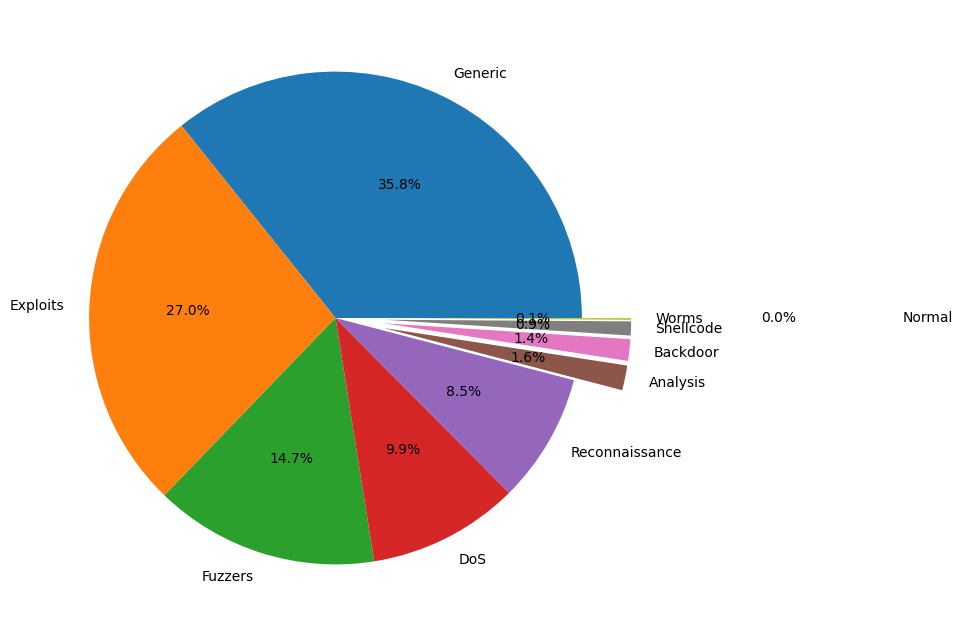

In [5]:
import matplotlib.pyplot as plt

validAttacks = df[df['label']==1]['attack_cat'].value_counts()
print(validAttacks)

#The subset is obtained by selecting the rows where the column label is equal to 1, and then selecting the column attack_cat. The value_counts() method returns a series that contains the frequency of each unique value in the column.

plt.figure(figsize = (15,8))
plt.pie(validAttacks,labels = validAttacks.index, autopct = '%1.1f%%',explode = [0,0,0,0,0,0.2,0.2,0.2,0.2,1.2])
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                257673 non-null  float64 
 1   proto              257673 non-null  int16   
 2   service            257673 non-null  int8    
 3   state              257673 non-null  int8    
 4   spkts              257673 non-null  int64   
 5   dpkts              257673 non-null  int64   
 6   sbytes             257673 non-null  int64   
 7   dbytes             257673 non-null  int64   
 8   rate               257673 non-null  float64 
 9   sttl               257673 non-null  int64   
 10  dttl               257673 non-null  int64   
 11  sload              257673 non-null  float64 
 12  dload              257673 non-null  float64 
 13  sloss              257673 non-null  int64   
 14  dloss              257673 non-null  int64   
 15  sinpkt             257673 non-null

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['attack_cat', 'label']) ##all columns except 42 and 43 since were predicting the type of attack
y = df['label'].values ## predict whether it is 0 or 1  label column into a numpy array by values cause
#. A numpy array is more efficient and compatible for numerical computations than a pandas series

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

feature_names = list(X.columns)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (180371, 42)
y_train shape:  (180371,)
X_test shape:  (77302, 42)
y_test shape:  (77302,)


Models


Decision tree

In [7]:
##Decision trees
# Import modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split data into training and test sets
X = df.drop(columns = ['attack_cat', 'label'])
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Create a decision tree model
dt = DecisionTreeClassifier(max_depth=10, criterion='gini', random_state=11)

# Fit the model to the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.9324467672246514


ACC OF TRAIN

In [36]:
predictions_test=dt.predict(X_test)
accuracy_score(y_test, predictions_test)

##since its nearish to the test no overfitting can be seenn mmmmmhhh

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.9324467672246514

In [11]:
# Import modules
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Calculate and print the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)


Accuracy:  0.9324467672246514
Precision:  0.9627236996153203
Recall:  0.9305084060782411
F1-score:  0.9463419646526922


Confusion matrix for Decision tree

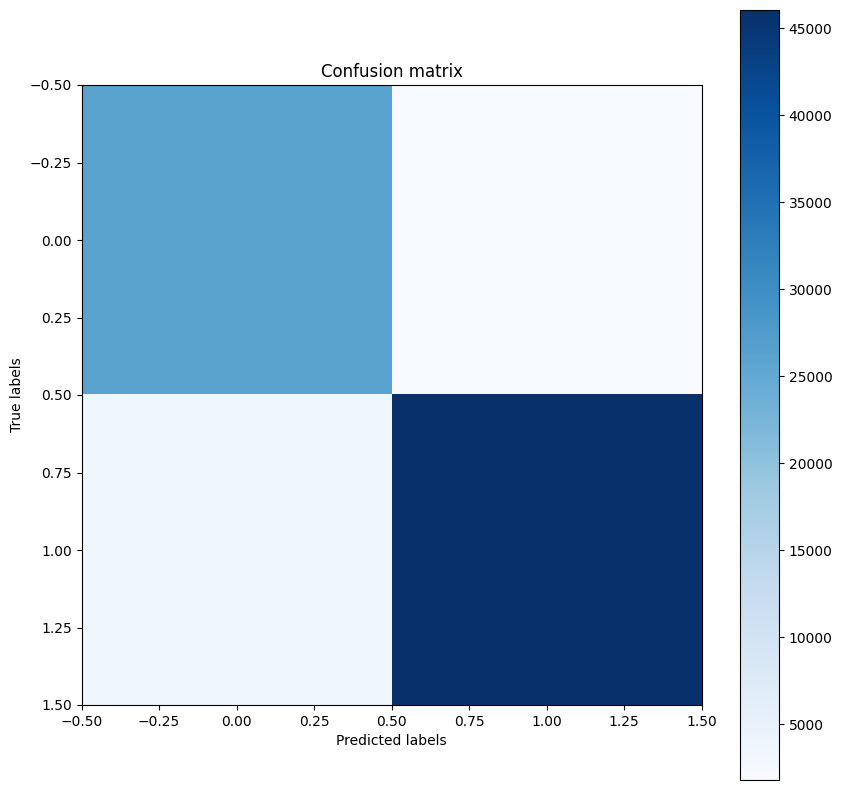

In [12]:
# Import modules
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.colorbar()
plt.show()


RUles present in the tree

In [13]:
# Import module
from sklearn.tree import export_text

# Get the textual representation of the decision tree
rules = export_text(dt, feature_names=feature_names)

# Print the rules to the console
print(rules)
##what each means

|--- sttl <= 61.00
|   |--- sinpkt <= 0.00
|   |   |--- smean <= 53.00
|   |   |   |--- class: 0
|   |   |--- smean >  53.00
|   |   |   |--- smean <= 62.50
|   |   |   |   |--- class: 1
|   |   |   |--- smean >  62.50
|   |   |   |   |--- class: 0
|   |--- sinpkt >  0.00
|   |   |--- class: 0
|--- sttl >  61.00
|   |--- synack <= 0.04
|   |   |--- smean <= 52.50
|   |   |   |--- ct_srv_src <= 2.50
|   |   |   |   |--- proto <= 116.00
|   |   |   |   |   |--- state <= 6.00
|   |   |   |   |   |   |--- proto <= 47.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- proto >  47.00
|   |   |   |   |   |   |   |--- ct_src_dport_ltm <= 3.00
|   |   |   |   |   |   |   |   |--- dttl <= 253.00
|   |   |   |   |   |   |   |   |   |--- ct_dst_ltm <= 22.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- ct_dst_ltm >  22.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- dttl >  253.00


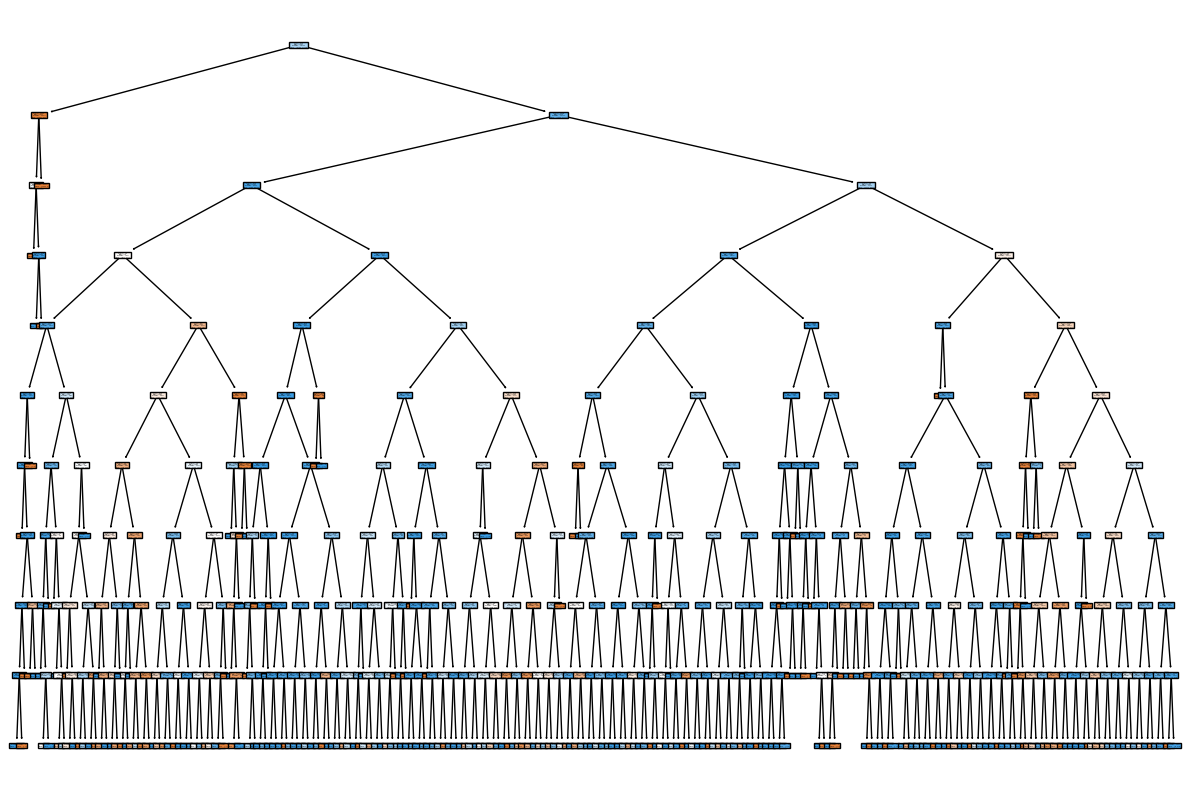

In [37]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)
plt.show()

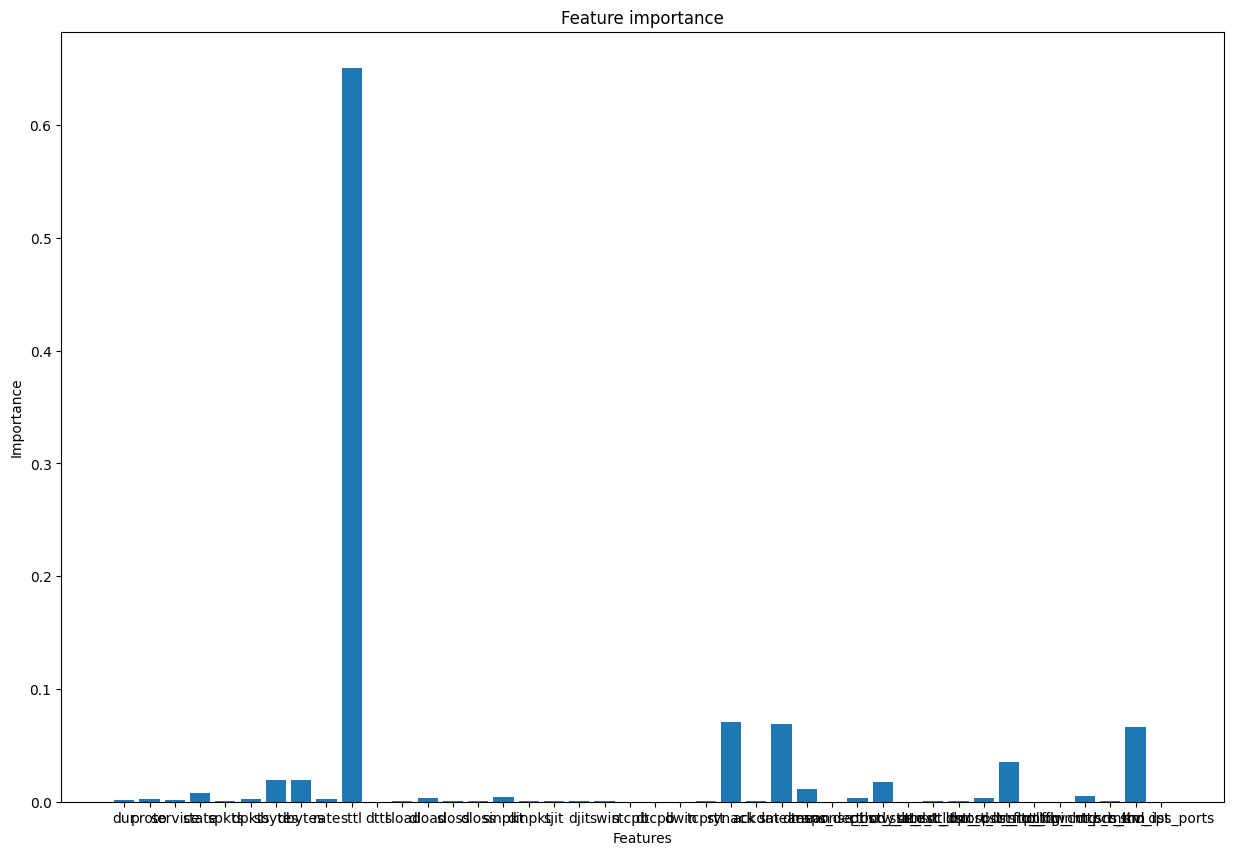

In [11]:
# Import module
import matplotlib.pyplot as plt

# Get the feature importance values
feature_importance = dt.feature_importances_

# Plot the feature importance values
plt.figure(figsize=(15, 10))
plt.bar(feature_names, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature importance')
plt.show()


Random Forest

In [10]:
# Create a random forest model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='gini', random_state=11)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9343225272308607


In [14]:
# Import modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Split data into training and test sets
X = df.drop(columns = ['attack_cat', 'label']) # Drop the columns that are not used as features
y = df['label'].values # Convert the label column to a numpy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11) # Use 30% of the data for testing and 70% for training

# Create an imputer object with mean strategy
imputer = SimpleImputer(strategy='mean') # Replace the missing values with the mean of each column

# Fit the imputer object to the training data
imputer.fit(X_train)

# Transform both the training and test data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Create a random forest model
rf = RandomForestClassifier(n_estimators=200, max_depth=15, criterion='entropy', random_state=11) # Use 200 trees, 15 levels of depth, entropy as the impurity measure, and a fixed seed for reproducibility

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred) # Use accuracy as the metric to measure how well the model predicts the labels
print("Accuracy: ", accuracy)


Accuracy:  0.941165817184549


Accuracy:  0.9515924555638923


<Figure size 1500x1000 with 0 Axes>

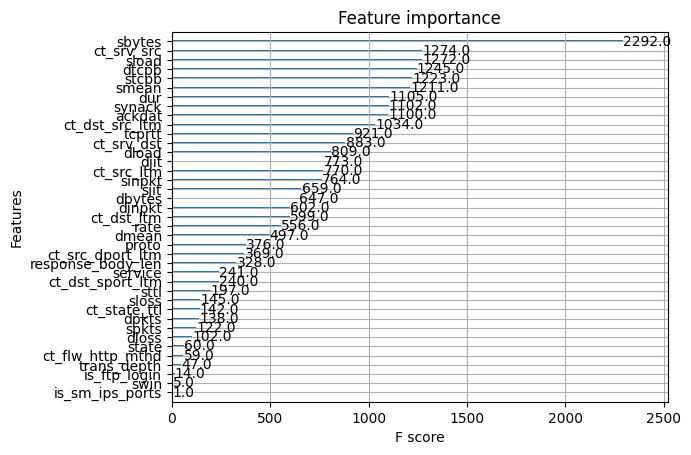

In [8]:
# Create an XGBoost model


from xgboost import XGBClassifier, plot_importance
xgb = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, objective='binary:logistic', random_state=11) # Use 200 trees, 10 levels of depth, 0.1 learning rate, binary logistic objective function, and a fixed seed for reproducibility

# Fit the model to the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred) # Use accuracy as the metric to measure how well the model predicts the labels
print("Accuracy: ", accuracy)

# Plot the feature importance of the model
plt.figure(figsize=(15, 10))
plot_importance(xgb)
plt.xlabel('F score')
plt.ylabel('Features')
plt.title('Feature importance')
plt.show()

Accuracy:  0.803847248454115


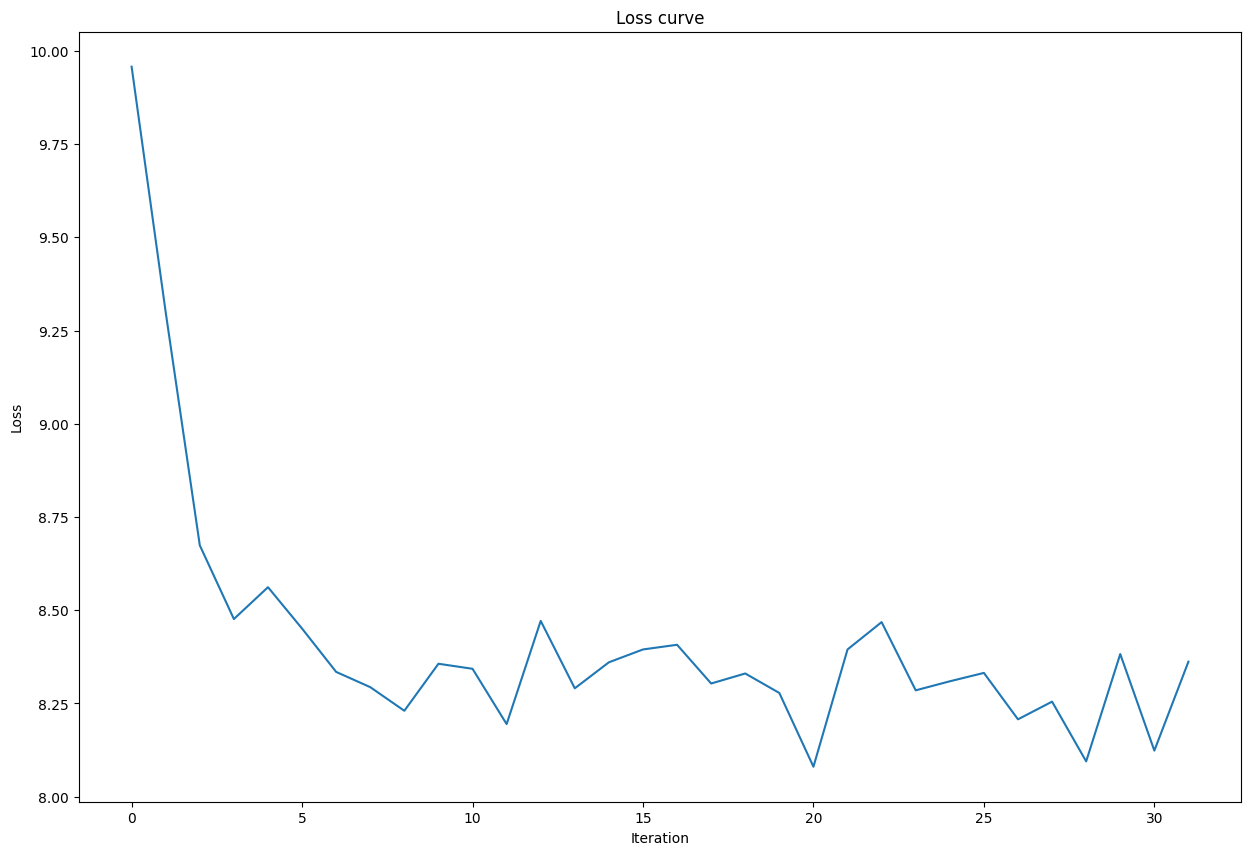

In [9]:
# Import modules
from sklearn.neural_network import MLPClassifier # Use the MLPClassifier class from scikit-learn



# Create a neural network model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=200, random_state=11) # Use two hidden layers with 100 and 50 neurons each, relu activation function, adam optimizer, 200 iterations, and a fixed seed for reproducibility

# Fit the model to the training data
mlp.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred) # Use accuracy as the metric to measure how well the model predicts the labels
print("Accuracy: ", accuracy)

# Plot the loss curve of the model
plt.figure(figsize=(15, 10))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss curve')
plt.show()


Traffic partss yay

captures packets in real-time from the specified network interface on your system using the Pyshark library. This allows you to scan all incoming traffic from the network interface and extract the specified features from each captured packet.
 

 PyShark [8] is a Python wrapper for Tshark [10]. It simply uses its ability to export XML data using its parsing. Tshark itself is the command-line version of Wireshark. Both Tshark and PyShark depend on the Pcap library that actually captures network packages and is maintained under the hood of Tcpdump 

In [ ]:
import pyshark

# specify the network interface to capture packets from
#traffic coming in from my network interface  
interface = 'eth0'

# create a capture object
capture = pyshark.LiveCapture(interface=interface)

# specify the features to extract and their corresponding dataset feature names
features = [
    ('ip.src', 'srcip'),
    ('ip.dst', 'dstip'),
    ('tcp.srcport', 'sport'),
    ('tcp.dstport', 'dport'),
  
]

# iterate over captured packets
for packet in capture.sniff_continuously():
    # create a dictionary to store the extracted and transformed features
    packet_features = {}
    
    # iterate over the specified features
    # for feature, dataset_feature in features:
    #     # extract the feature value from the packet
    #     value = packet[layer].get(field) for layer, field in feature.split('.')
        
    #     # transform the extracted value to match the corresponding feature in your dataset
    #     transformed_value = transform_value(value, dataset_feature)
        
    #     # store the transformed value in the dictionary
    #     packet_features[dataset_feature] = transformed_value
    
    # pass the extracted and transformed features to your trained model for classification
    classification = model.predict(packet_features)
    
    # if the packet is classified as anomalous, then necxt part web app using stream lit 
    if classification == 1:
        print(f'Anomalous packet detected: {packet}')


In [2]:
import pyshark

# specify the network interface to capture packets from
interface = 'wlan0'

# create a capture object
capture = pyshark.LiveCapture(interface=interface)

# iterate over captured packets
for packet in capture.sniff_continuously():
    # print the captured packet
    print(packet)


TSharkNotFoundException: TShark not found. Try adding its location to the configuration file. Searched these paths: ['C:\\Program Files\\Wireshark\\tshark.exe', '/home/codespace/.python/current/bin/tshark', '/vscode/bin/linux-x64/6c3e3dba23e8fadc360aed75ce363ba185c49794/bin/remote-cli/tshark', '/home/codespace/.local/bin/tshark', '/home/codespace/.dotnet/tshark', '/home/codespace/nvm/current/bin/tshark', '/home/codespace/.php/current/bin/tshark', '/home/codespace/.python/current/bin/tshark', '/home/codespace/java/current/bin/tshark', '/home/codespace/.ruby/current/bin/tshark', '/home/codespace/.local/bin/tshark', '/usr/local/python/current/bin/tshark', '/usr/local/py-utils/bin/tshark', '/usr/local/oryx/tshark', '/usr/local/go/bin/tshark', '/go/bin/tshark', '/usr/local/sdkman/bin/tshark', '/usr/local/sdkman/candidates/java/current/bin/tshark', '/usr/local/sdkman/candidates/gradle/current/bin/tshark', '/usr/local/sdkman/candidates/maven/current/bin/tshark', '/usr/local/sdkman/candidates/ant/current/bin/tshark', '/usr/local/rvm/gems/default/bin/tshark', '/usr/local/rvm/gems/default@global/bin/tshark', '/usr/local/rvm/rubies/default/bin/tshark', '/usr/local/share/rbenv/bin/tshark', '/usr/local/php/current/bin/tshark', '/opt/conda/bin/tshark', '/usr/local/nvs/tshark', '/usr/local/share/nvm/current/bin/tshark', '/usr/local/hugo/bin/tshark', '/usr/local/dotnet/current/tshark', '/usr/local/sbin/tshark', '/usr/local/bin/tshark', '/usr/sbin/tshark', '/usr/bin/tshark', '/sbin/tshark', '/bin/tshark', '/usr/local/rvm/bin/tshark', '/vscode/bin/linux-x64/6c3e3dba23e8fadc360aed75ce363ba185c49794/bin/remote-cli/tshark', '/home/codespace/.local/bin/tshark', '/home/codespace/.dotnet/tshark', '/home/codespace/nvm/current/bin/tshark', '/home/codespace/.php/current/bin/tshark', '/home/codespace/.python/current/bin/tshark', '/home/codespace/java/current/bin/tshark', '/home/codespace/.ruby/current/bin/tshark', '/home/codespace/.local/bin/tshark', '/usr/local/python/current/bin/tshark', '/usr/local/py-utils/bin/tshark', '/usr/local/oryx/tshark', '/usr/local/go/bin/tshark', '/go/bin/tshark', '/usr/local/sdkman/bin/tshark', '/usr/local/sdkman/candidates/java/current/bin/tshark', '/usr/local/sdkman/candidates/gradle/current/bin/tshark', '/usr/local/sdkman/candidates/maven/current/bin/tshark', '/usr/local/sdkman/candidates/ant/current/bin/tshark', '/usr/local/rvm/gems/default/bin/tshark', '/usr/local/rvm/gems/default@global/bin/tshark', '/usr/local/rvm/rubies/default/bin/tshark', '/usr/local/share/rbenv/bin/tshark', '/usr/local/php/current/bin/tshark', '/opt/conda/bin/tshark', '/usr/local/nvs/tshark', '/usr/local/share/nvm/current/bin/tshark', '/usr/local/hugo/bin/tshark', '/usr/local/dotnet/current/tshark', '/usr/local/sbin/tshark', '/usr/local/bin/tshark', '/usr/sbin/tshark', '/usr/bin/tshark', '/sbin/tshark', '/bin/tshark', '/usr/local/rvm/bin/tshark']